<a href="https://www.kaggle.com/code/sikaro/harmful-brain-eda?scriptVersionId=162599528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train=pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')
test=pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/test.csv')
submission=pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/sample_submission.csv')

train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [2]:
train[train['eeg_id'] != 1628180742].head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
9,2277392603,0,0.0,924234,0,0.0,1978807404,30539,GPD,0,0,5,0,1,5
10,2277392603,1,2.0,924234,1,2.0,134339127,30539,GPD,0,0,5,0,1,5
11,722738444,0,0.0,999431,0,0.0,557980729,56885,LRDA,0,1,0,14,0,1
12,722738444,1,2.0,999431,1,2.0,1949834128,56885,LRDA,0,1,0,14,0,1
13,722738444,2,4.0,999431,2,4.0,3790867376,56885,LRDA,0,1,0,14,0,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [4]:
train.tail()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0
106799,351917269,10,20.0,2147388374,10,20.0,3642716176,10351,LRDA,0,0,0,3,0,0


In [5]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [6]:
test.head()

,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   spectrogram_id  1 non-null      int64
 1   eeg_id          1 non-null      int64
 2   patient_id      1 non-null      int64
dtypes: int64(3)
memory usage: 152.0 bytes


In [8]:
submission.head()

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [9]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    
    return summary
   
resumetable(train)

데이터 세트 형상: (106800, 15)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,eeg_id,int64,0,17089,1628180742,1628180742
1,eeg_sub_id,int64,0,743,0,1
2,eeg_label_offset_seconds,float64,0,1502,0.0,6.0
3,spectrogram_id,int64,0,11138,353733,353733
4,spectrogram_sub_id,int64,0,1022,0,1
5,spectrogram_label_offset_seconds,float64,0,4686,0.0,6.0
6,label_id,int64,0,106800,127492639,3887563113
7,patient_id,int64,0,1950,42516,42516
8,expert_consensus,object,0,6,Seizure,Seizure
9,seizure_vote,int64,0,18,3,3


In [10]:
t_copy = train.copy()
t_copy =t_copy.sort_values(['eeg_id'])
t_copy

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
40927,568657,0,0.0,789577333,0,0.0,1825637311,20654,Other,0,0,3,0,2,7
40928,568657,1,6.0,789577333,1,6.0,3640441665,20654,Other,0,0,3,0,2,7
40929,568657,2,12.0,789577333,2,12.0,1364530340,20654,Other,0,0,3,0,2,7
40930,568657,3,16.0,789577333,3,16.0,1874525225,20654,Other,0,0,3,0,2,7
77124,582999,8,24.0,1552638400,8,24.0,129939089,20230,LPD,0,12,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33556,4294858825,1,2.0,657299228,1,2.0,2581506921,4312,Other,0,0,0,0,1,14
33559,4294858825,4,12.0,657299228,4,12.0,3219273381,4312,Other,0,0,0,0,1,14
33555,4294858825,0,0.0,657299228,0,0.0,561576493,4312,Other,0,0,0,0,1,14
33558,4294858825,3,8.0,657299228,3,8.0,3646714202,4312,Other,0,0,0,0,1,14


In [11]:
print([t_copy['eeg_id'].min(),t_copy['eeg_id'].max()])
print([t_copy['spectrogram_id'].min(),t_copy['spectrogram_id'].max()])
print([t_copy['patient_id'].min(),t_copy['patient_id'].max()])

[568657, 4294958358]
[353733, 2147388374]
[56, 65494]


In [12]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt #시각화 툴
stats.pearsonr(train['eeg_id'],train['spectrogram_id'] )

PearsonRResult(statistic=-0.00771522617580455, pvalue=0.011690062195768723)

In [13]:
stats.pearsonr(t_copy['eeg_id'],t_copy['spectrogram_id'] )

PearsonRResult(statistic=-0.007715226175804533, pvalue=0.011690062195768723)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='eeg_id', ylabel='spectrogram_id'>

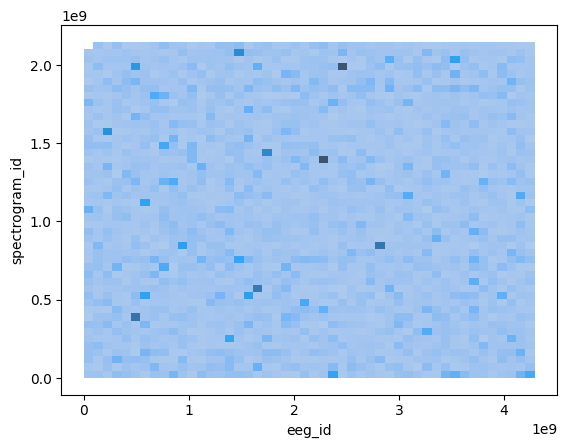

In [14]:
sns.histplot(x =t_copy['eeg_id'], y=t_copy['spectrogram_id'])

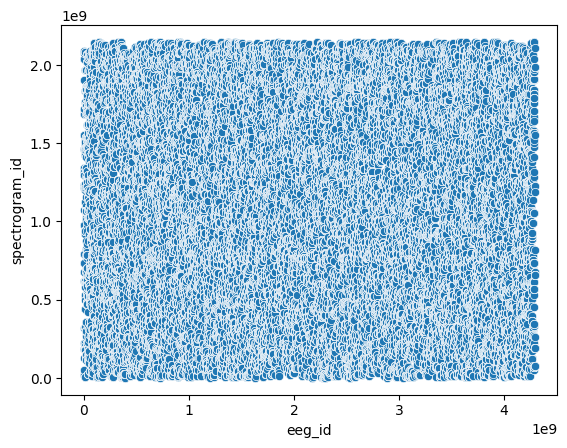

In [15]:
sns.scatterplot(x =t_copy['eeg_id'], y=t_copy['spectrogram_id'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

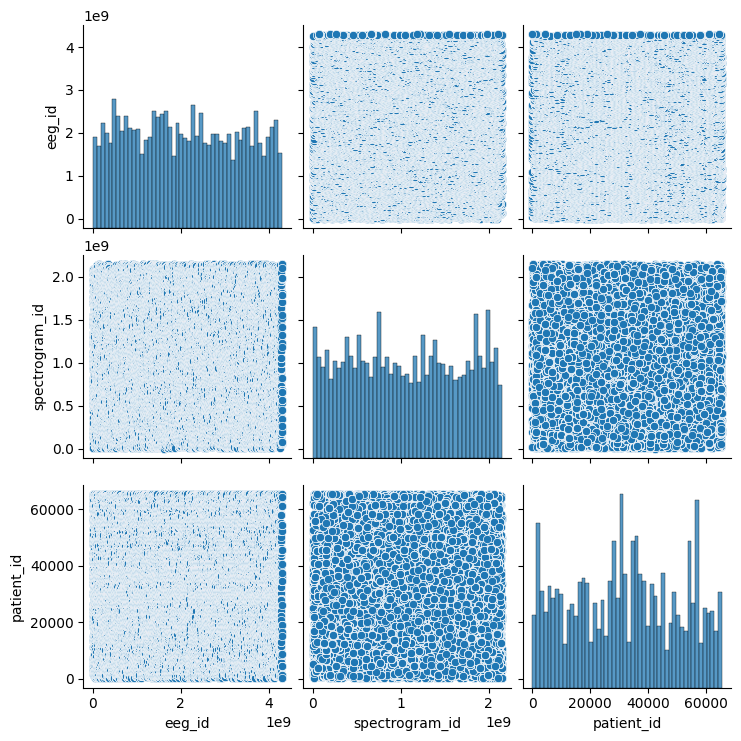

In [16]:
sns.pairplot(t_copy[['eeg_id','spectrogram_id','patient_id']])
plt.show

In [17]:
t_copy = t_copy.drop_duplicates('eeg_id')
t_copy

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
40927,568657,0,0.0,789577333,0,0.0,1825637311,20654,Other,0,0,3,0,2,7
77124,582999,8,24.0,1552638400,8,24.0,129939089,20230,LPD,0,12,0,1,0,1
1150,642382,1,24.0,14960202,13,1032.0,2552357208,5955,Other,0,0,0,0,0,1
31929,751790,0,0.0,618728447,4,908.0,2898467035,38549,GPD,0,0,1,0,0,0
3319,778705,0,0.0,52296320,0,0.0,3255875127,40955,Other,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59218,4293354003,0,0.0,1188113564,0,0.0,447244163,16610,GRDA,0,0,0,0,1,1
77025,4293843368,0,0.0,1549502620,0,0.0,1618953053,15065,GRDA,0,0,0,0,1,1
105275,4294455489,0,0.0,2105480289,0,0.0,469526364,56,Other,0,0,0,0,0,1
33557,4294858825,2,6.0,657299228,2,6.0,3251917981,4312,Other,0,0,0,0,1,14


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='eeg_id', ylabel='Count'>

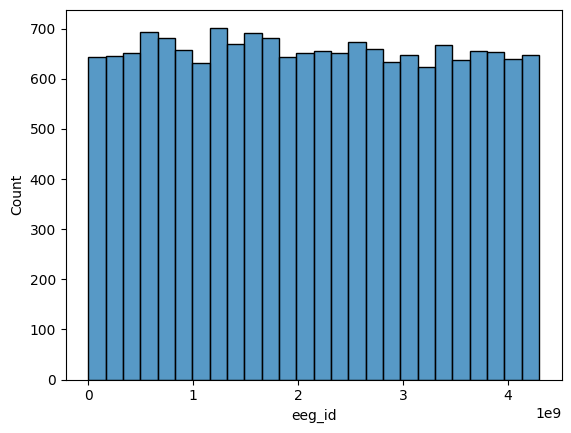

In [18]:
sns.histplot(x=t_copy['eeg_id'])

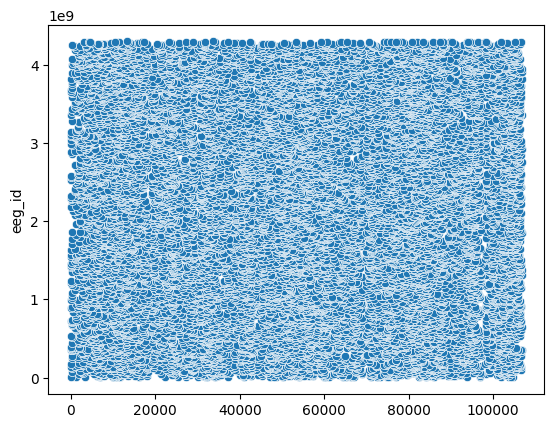

In [19]:
sns.scatterplot(t_copy['eeg_id'])
plt.show()

<Axes: >

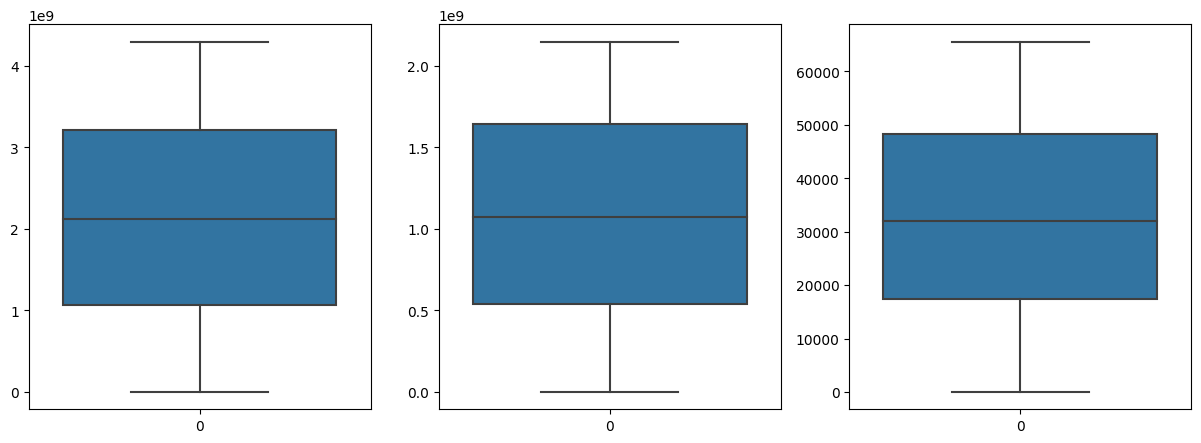

In [20]:
fig,ax = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(t_copy['eeg_id'],ax=ax[0])
sns.boxplot(t_copy['spectrogram_id'],ax=ax[1])
sns.boxplot(t_copy['patient_id'],ax=ax[2])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='eeg_id', ylabel='Density'>

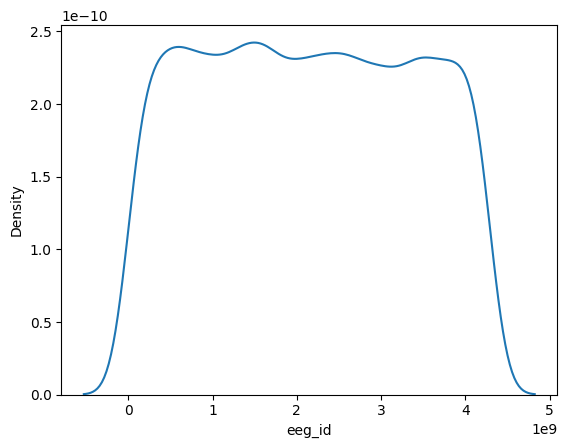

In [21]:
sns.kdeplot(t_copy['eeg_id'])

In [22]:
t_copy2 = train.copy()
t_copy2

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [23]:
t_drop = t_copy2.drop_duplicates(['seizure_vote','lpd_vote','gpd_vote','lrda_vote','grda_vote','other_vote' ])
t_drop

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
9,2277392603,0,0.0,924234,0,0.0,1978807404,30539,GPD,0,0,5,0,1,5
11,722738444,0,0.0,999431,0,0.0,557980729,56885,LRDA,0,1,0,14,0,1
22,387987538,0,0.0,1084844,0,0.0,4099147263,4264,LRDA,0,0,0,3,0,0
30,1626798710,0,0.0,1219001,2,74.0,3631726128,23435,Seizure,3,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106623,3588723605,4,56.0,2144587113,4,56.0,315346578,56450,Seizure,2,0,0,2,0,0
106683,353975060,0,0.0,2145400096,0,0.0,565359158,26349,Other,0,1,0,5,0,8
106713,710661383,0,0.0,2145546675,0,0.0,3005255933,8651,LPD,0,7,1,0,0,3
106731,2982417621,0,0.0,2145983945,0,0.0,3989519932,7118,LRDA,0,1,0,10,0,4


<Axes: >

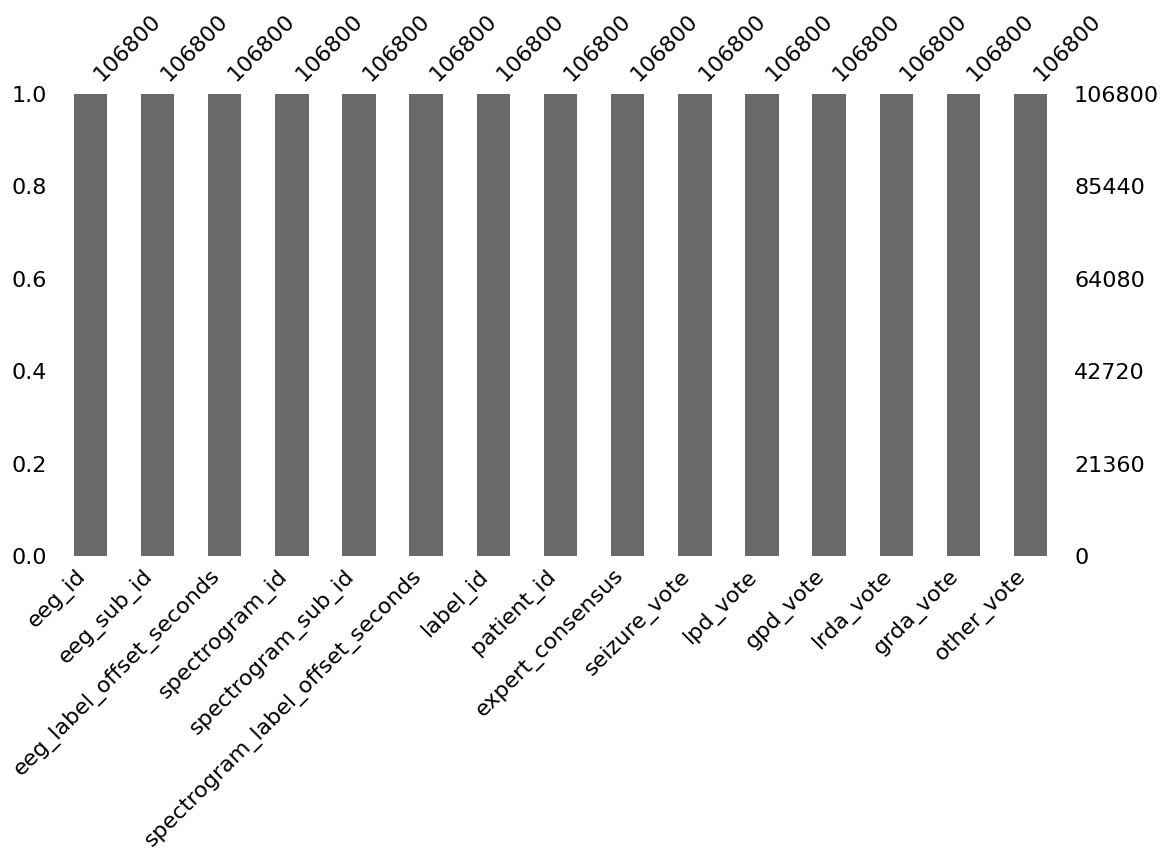

In [24]:
import missingno as msno
t_copy2 = train.copy()
msno.bar(df=t_copy2.iloc[:, :], figsize=(13, 6))

In [25]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

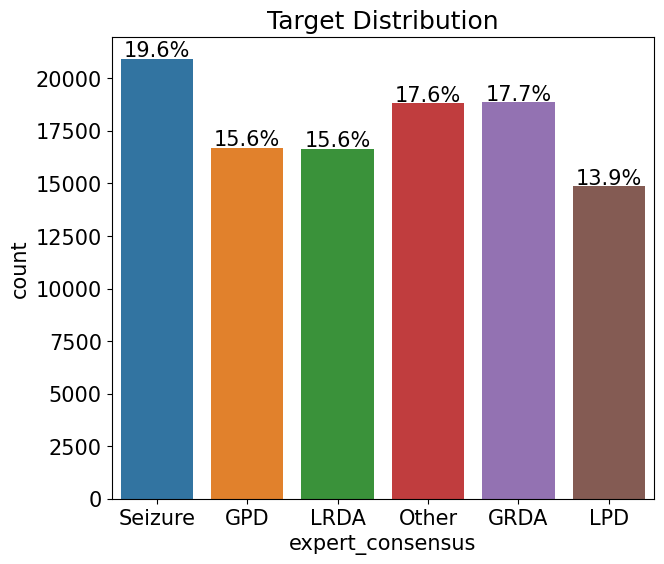

In [26]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(left_coord + width/2.0,     # x축 위치
                height + total_size*0.001,  # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center')                # 가운데 정렬
    
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))
ax = sns.countplot(x='expert_consensus', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

In [27]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}') 
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입']) #데이터 타입별로 서머리
    summary = summary.reset_index() #그렇게 구한 서버리를 index 리셋
    summary = summary.rename(columns={'index': '피처'}) #피처를 
    summary['결측값 개수'] = df.isnull().sum().values #결측값 개수 열 추가
    summary['고윳값 개수'] = df.nunique().values #고윳값 개수 열 추가
    summary['첫 번째 값'] = df.loc[0].values #첫째값
    summary['두 번째 값'] = df.loc[1].values #둘째값
    
    return summary
   
summary=resumetable(train)
summary

데이터 세트 형상: (106800, 15)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,eeg_id,int64,0,17089,1628180742,1628180742
1,eeg_sub_id,int64,0,743,0,1
2,eeg_label_offset_seconds,float64,0,1502,0.0,6.0
3,spectrogram_id,int64,0,11138,353733,353733
4,spectrogram_sub_id,int64,0,1022,0,1
5,spectrogram_label_offset_seconds,float64,0,4686,0.0,6.0
6,label_id,int64,0,106800,127492639,3887563113
7,patient_id,int64,0,1950,42516,42516
8,expert_consensus,object,0,6,Seizure,Seizure
9,seizure_vote,int64,0,18,3,3


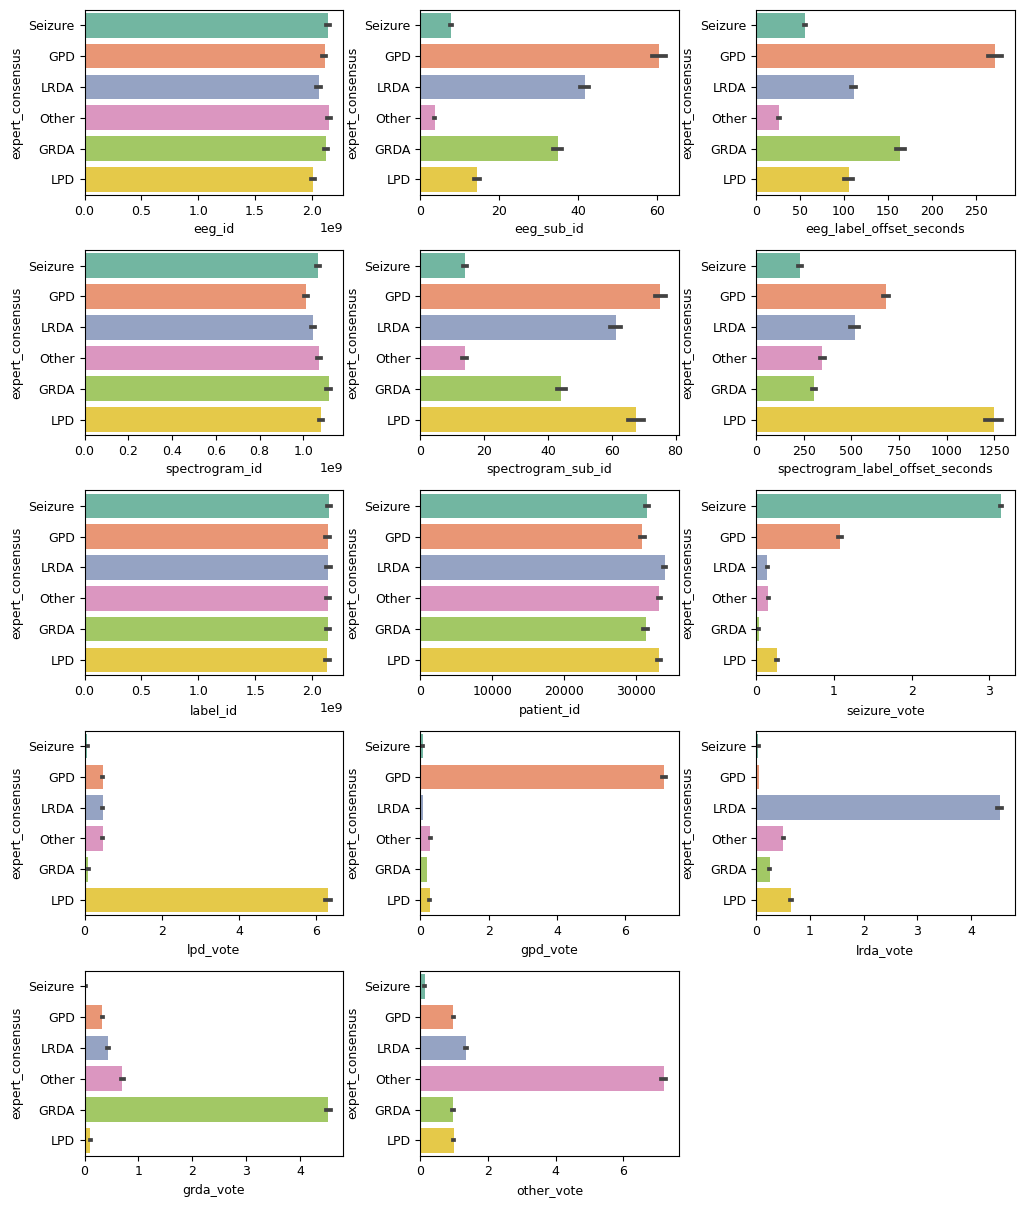

In [28]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='expert_consensus', data=df, palette='Set2', ax=ax)

t_copy3 = train.drop('expert_consensus',axis=1)
bin_features = t_copy3.columns
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3) # 6행 3열 배치

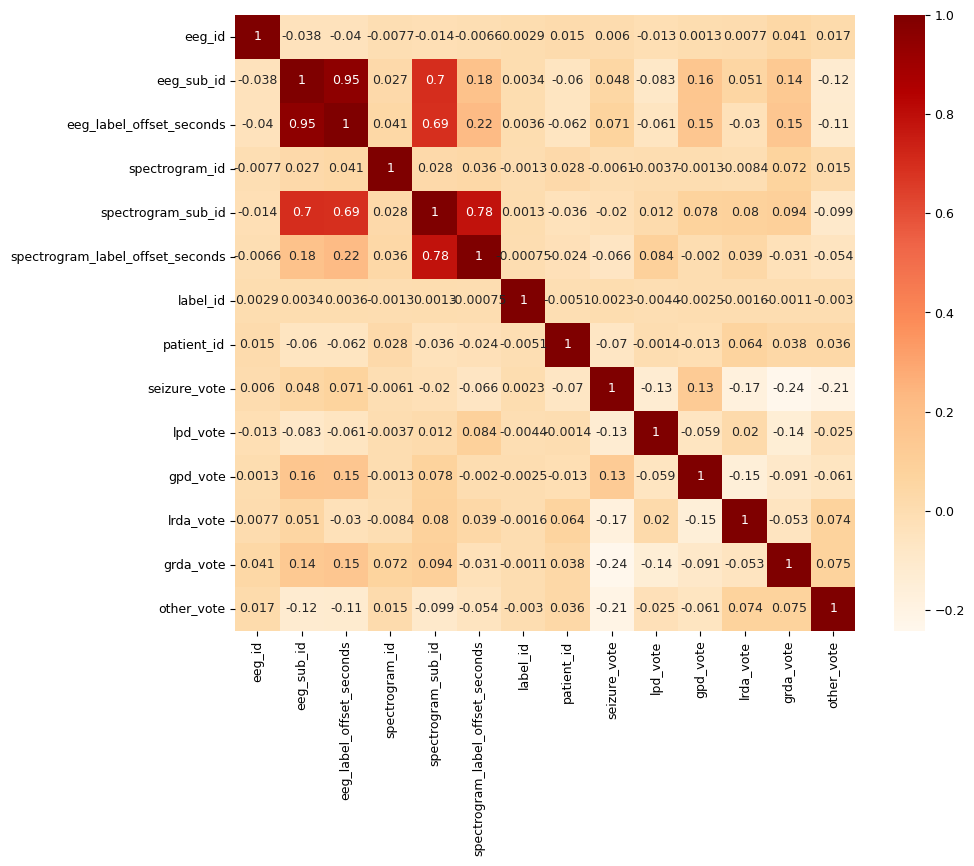

In [29]:
plt.figure(figsize=(10, 8))
cont_corr = t_copy3[bin_features].corr()     # 연속형 피처 간 상관관계 
sns.heatmap(cont_corr, annot=True, cmap='OrRd'); # 히트맵 그리기
plt.savefig('상관계수1.jpg', format='jpeg')

In [30]:
feature = ['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD']

t_copy4 = train.copy()

# Create a dictionary to map feature names to their index numbers
feature_index = {feat: idx for idx, feat in enumerate(feature)}

# Apply the mapping to create a new column 'transform'
t_copy4['transform'] = t_copy4['expert_consensus'].map(feature_index)

t_copy4


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,transform
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0,2
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0,2
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0,2
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0,2


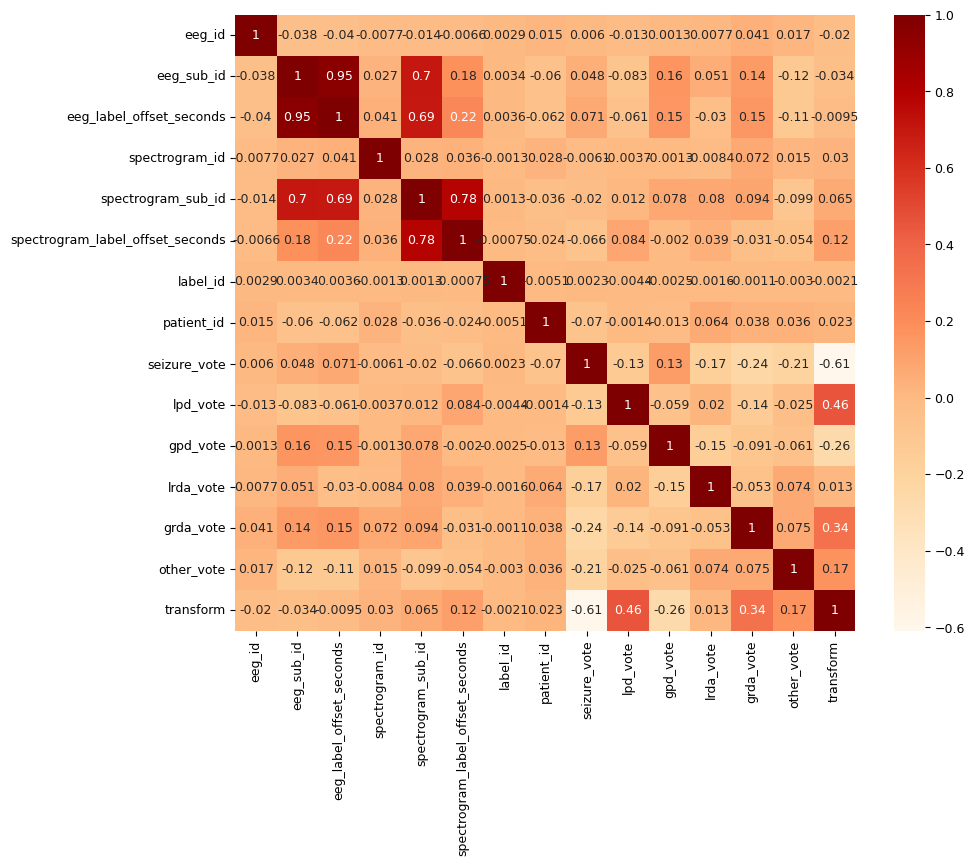

In [31]:
plt.figure(figsize=(10, 8))
t_copy4 = t_copy4.drop('expert_consensus',axis=1)
col = t_copy4.columns
cont_corr = t_copy4[col].corr()     # 연속형 피처 간 상관관계 
sns.heatmap(cont_corr, annot=True, cmap='OrRd'); # 히트맵 그리기
plt.savefig('상관계수2.jpg', format='jpeg')